In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
#DATA CLEANING
#exploratory analysis between variables (i.e. relationships, decided what to immediately drop) 
#deal with outliers


# ASUMPTION CHECKING SECTION
#check correlations for further column elimination (>.7)
#  -- checking corr, scatterplots 
# (we got rid of sqftlot15
# , model will be standardized
# , grade and sqftliving were highly corrleated buut we kept them and standardized it )


#check normality
#check hederoskedacisty 

#PREPROCESSING
#split categorical from continuous variables
#perform transformation on continuous
#perform OHE on categorical

#BUILD MODEL
# finalize regression


In [3]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data = data[data.sqft_basement != '?']
data['sqft_basement'] = data['sqft_basement'].astype(float)


data['yr_renovated'] = data['yr_renovated'].fillna(0)

data['bathrooms']=round(data['bathrooms']*2)/2



data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)


data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_renovated,month,season
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,False,False,10,fall
6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,47.7210,-122.319,1690,7639,True,True,12,fall
5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,...,0.0,98028,47.7379,-122.233,2720,8062,False,False,2,winter
2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,47.5208,-122.393,1360,5000,True,False,12,fall
1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,47.6168,-122.045,1800,7503,False,False,2,winter


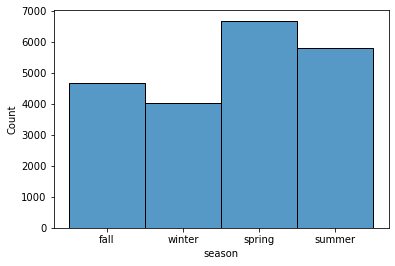

In [5]:
sns.histplot(data=data['season']);


In [6]:
# Drop variables that will not be apart of the model.
data.drop(['waterfront','view', 'sqft_above', 'zipcode','month', 'yr_renovated','sqft_basement'], axis=1, inplace=True)

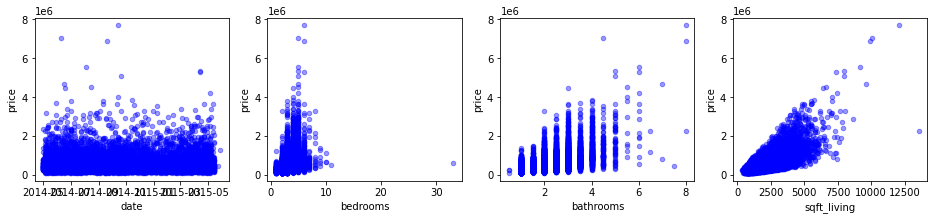

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms', 'sqft_living',], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

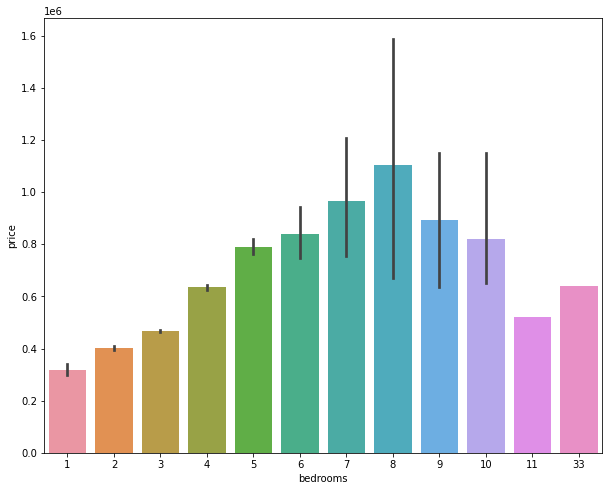

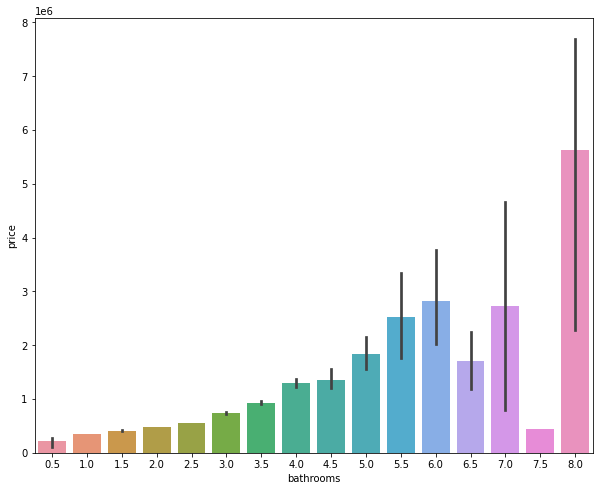

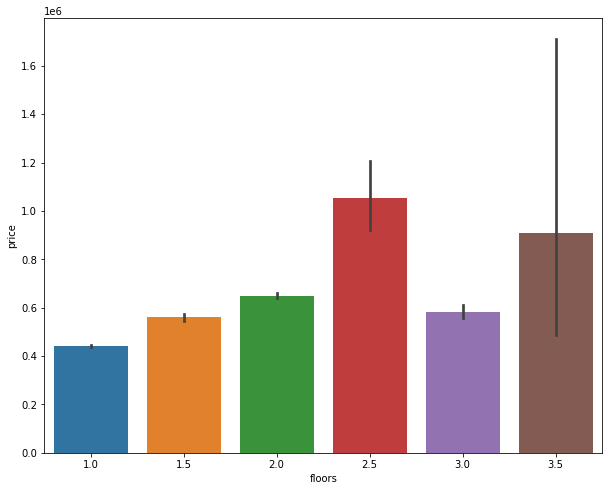

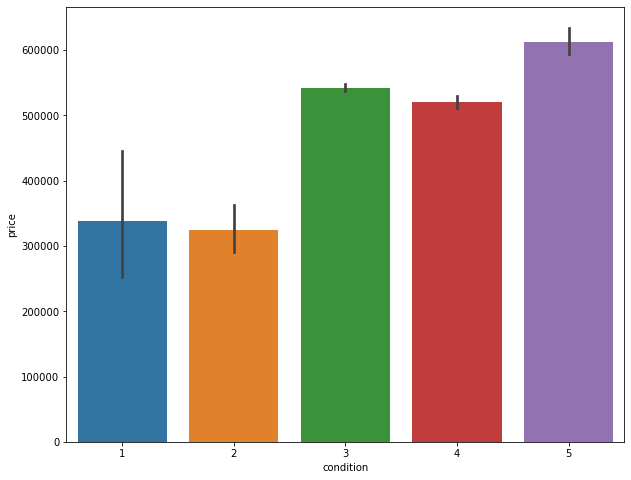

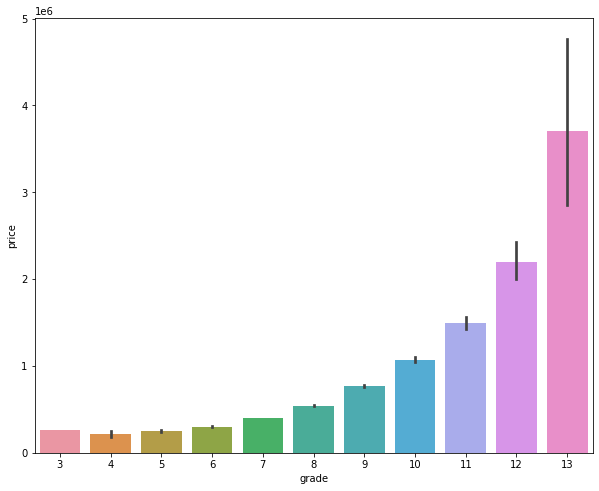

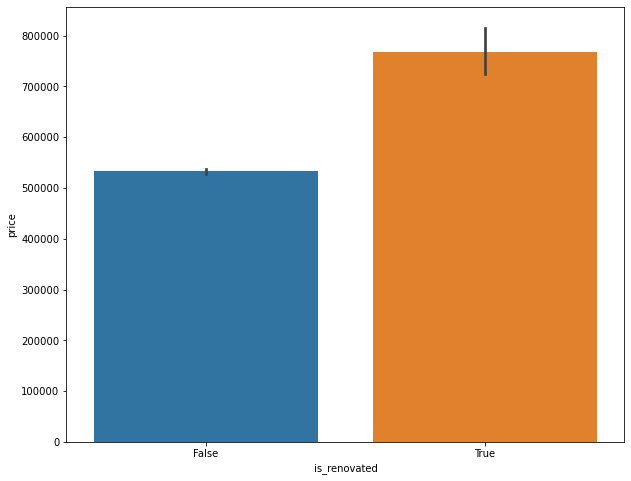

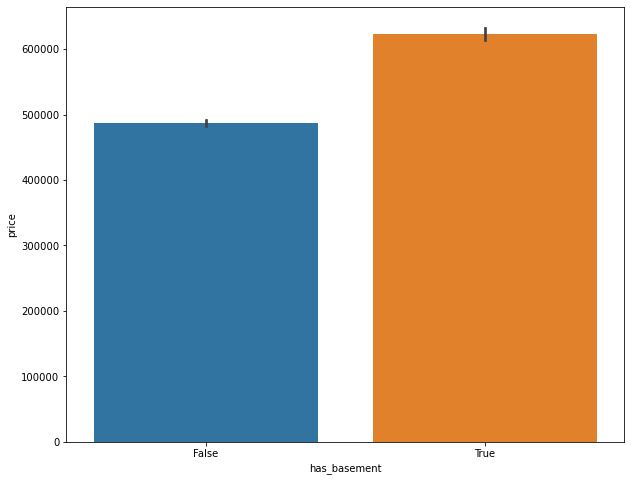

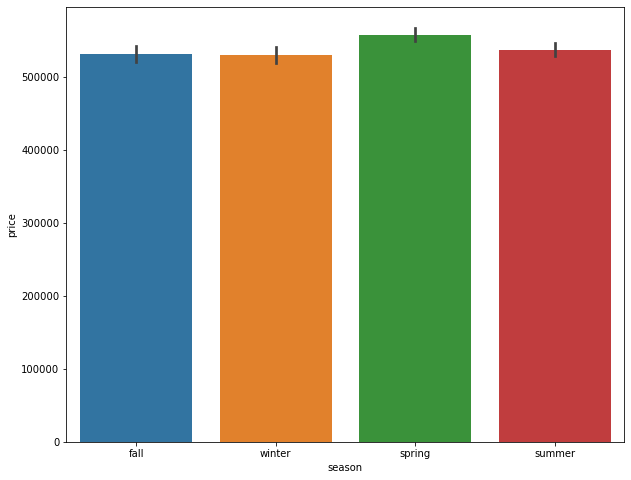

In [8]:
# Plot a bar graph for each discrete variable.


discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated','has_basement', 'season']
for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='price', data=data)

In [9]:
data.drop('season', axis=1, inplace=True)


In [10]:
continuous_features = [feature for feature in data.columns if feature not in discrete_features+['price']+['date']]
continuous_features

['sqft_living',
 'sqft_lot',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

<Figure size 432x288 with 0 Axes>

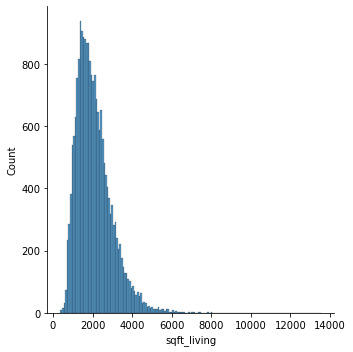

<Figure size 432x288 with 0 Axes>

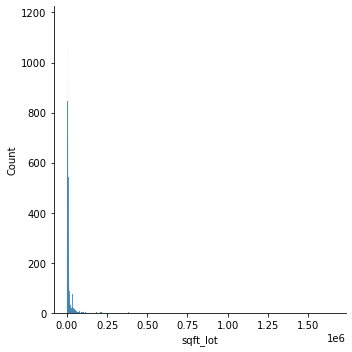

<Figure size 432x288 with 0 Axes>

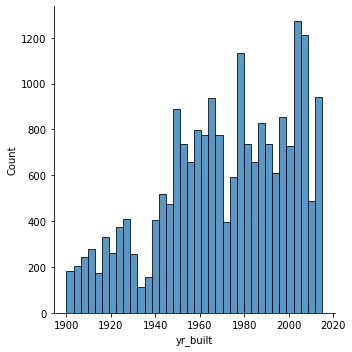

<Figure size 432x288 with 0 Axes>

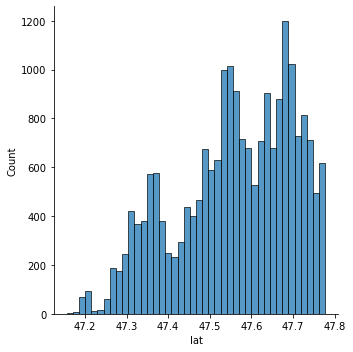

<Figure size 432x288 with 0 Axes>

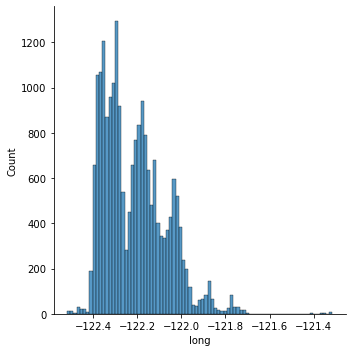

<Figure size 432x288 with 0 Axes>

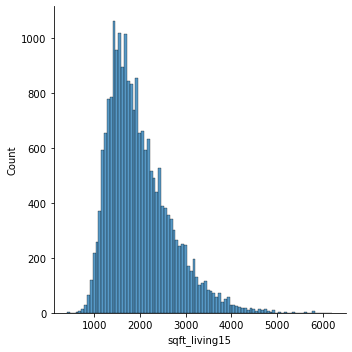

<Figure size 432x288 with 0 Axes>

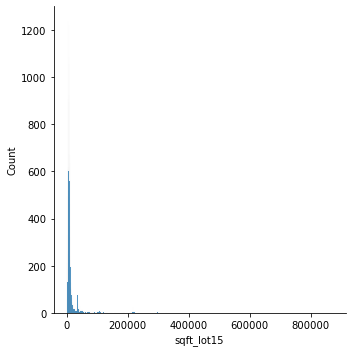

In [11]:
# Plot the distribution for each of the continuous variables


for feature in continuous_features:
    plt.figure()
    sns.displot(data[feature])

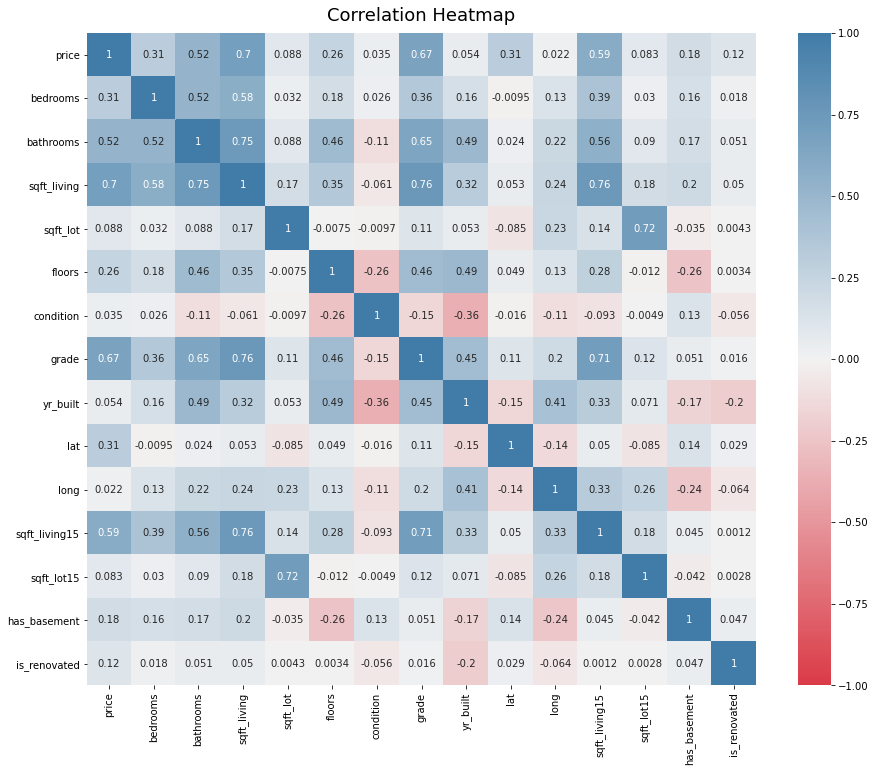

In [12]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [13]:
# Dealing with Outliers

def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit


def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit


# Removing outliers from continuous variables
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) & (data['sqft_living'] <= upper_limit(data['sqft_living']))]



In [14]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

In [15]:
data = data[(data['sqft_living15'] >= lower_limit(data['sqft_living15'])) & (data['sqft_living15'] <= upper_limit(data['sqft_living15']))]

In [16]:
data = data[(data['sqft_lot15'] >= lower_limit(data['sqft_lot15'])) & (data['sqft_lot15'] <= upper_limit(data['sqft_lot15']))]

In [17]:
# Remove outlier from bedroom data (33 bedrooms with 1620 sqft of living space)
# data[(data['bedrooms']==33)]
data = data[(data['bedrooms']!=33)]

In [18]:

# Look at the correlations of each columns with price.

price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.646800
grade            0.643538
sqft_living15    0.559596
bathrooms        0.460189
lat              0.363181
bedrooms         0.294626
floors           0.252868
has_basement     0.180632
is_renovated     0.126962
sqft_lot15       0.121899
sqft_lot         0.114814
condition        0.057957
yr_built         0.022790
long             0.003159
Name: price, dtype: float64

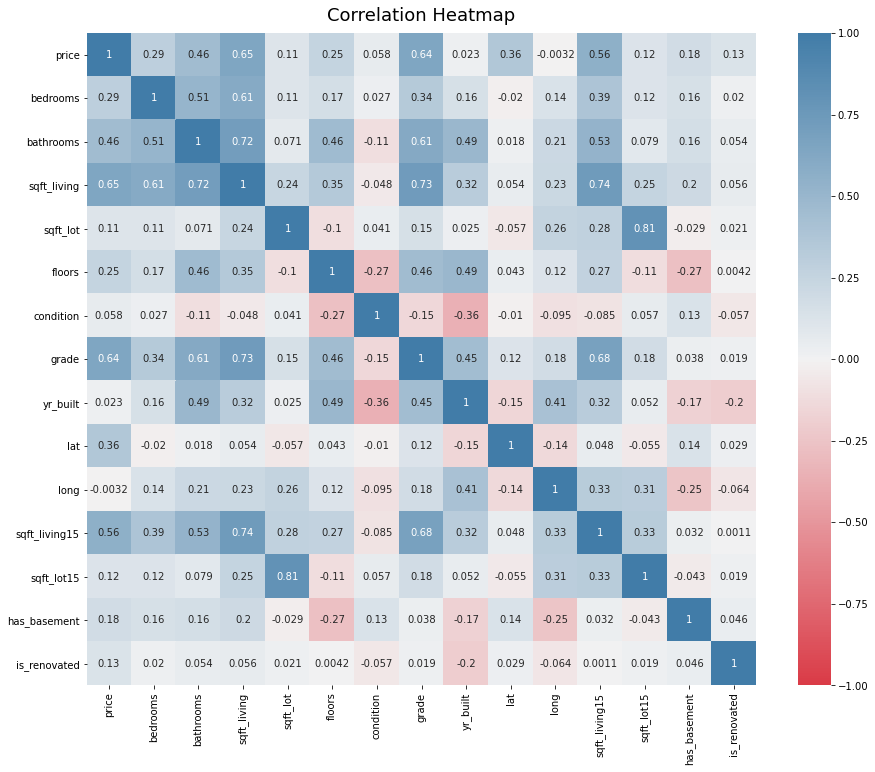

In [19]:
# Create a heat map to identify correlation between variables to look for issues with multicollinearity.

cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [20]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)


In [21]:
# Create dummy variables
dummy = pd.get_dummies(data, columns=['is_renovated', 'has_basement'], drop_first=True)
dummy.drop(labels=['date'], axis=1, inplace=True)
dummy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.0,1180,5650,1.0,3,7,1955,47.5112,-122.257,0,0
6414100192,538000.0,3,2.0,2570,7242,2.0,3,7,1951,47.7210,-122.319,1,1
5631500400,180000.0,2,1.0,770,10000,1.0,3,6,1933,47.7379,-122.233,0,0
2487200875,604000.0,4,3.0,1960,5000,1.0,5,7,1965,47.5208,-122.393,0,1
1954400510,510000.0,3,2.0,1680,8080,1.0,3,8,1987,47.6168,-122.045,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.5,1530,1131,3.0,3,8,2009,47.6993,-122.346,0,0
6600060120,400000.0,4,2.5,2310,5813,2.0,3,8,2014,47.5107,-122.362,0,0
1523300141,402101.0,2,1.0,1020,1350,2.0,3,7,2009,47.5944,-122.299,0,0


In [22]:
y = dummy['price']
X = dummy.drop(['price'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


16104 4027 16104 4027


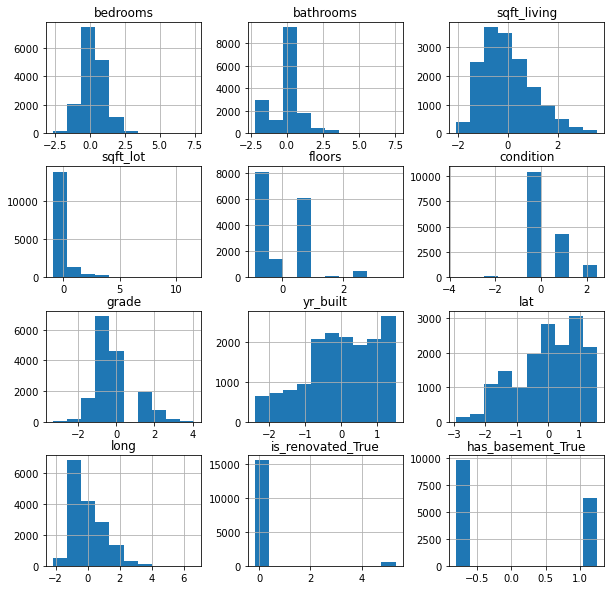

In [25]:
# Regression #1 : Using Standardized Variables

# Standard scale all variables

X_train_scaled = (X_train - np.mean(X_train))/ np.std(X_train)
y_train_scaled = (y_train - np.mean(y_train))/ np.std(y_train)

X_train_scaled.hist(figsize=[10,10]);


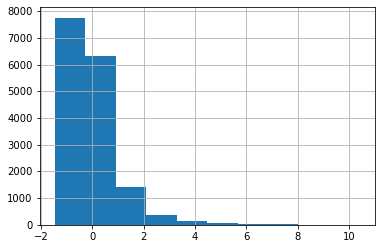

In [26]:
y_train_scaled.hist(figsize=[6,4]);


In [27]:
pred = sm.add_constant(X_train_scaled)
model = sm.OLS(endog=y_train_scaled, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2369.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:30:08   Log-Likelihood:                -14656.
No. Observations:               16104   AIC:                         2.934e+04
Df Residuals:                   16091   BIC:                         2.944e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.478e-13      0.005   3.12e-11      1.000      -0.009       0.009
bedrooms             -0.0959      0.006    -15.453      0.000      -0.108      -0.084
bathrooms             0.0775      0.008      9.691      0.000       0.062       0.093
sqft_living           0.4254      0.009     44.830      0.000       0.407       0.444
sqft_lot             -0.0145      0.005     -2.792      0.005      -0.025      -0.004
floors                0.0336      0.006      5.212      0.000       0.021       0.046
condition             0.0723      0.005     13.828      0.000       0.062       0.083
grade                 0.4017      0.008     51.587      0.000       0.386       0.417
yr_built             -0.2459      0.007    -34.188      0.000      -0.260      -0.232
lat                   0.2471      0.005     49.373      0.000       0.237       0.257
long                 -0.0331      0.006     -5.864      0.000      -0.044      -0.022
is_renovated_True     0.0366      0.005      7.337      0.000       0.027       0.046
has_basement_True    -0.0076      0.006     -1.334      0.182      -0.019       0.004
==============================================================================
Omnibus:                     9992.609   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211936.414
Skew:                           2.613   Prob(JB):                         0.00
Kurtosis:                      19.987   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
reg.score(X_train_scaled, y_train_scaled)

0.638573517741792

In [29]:
X_test_scaled = (X_test - np.mean(X_test))/ np.std(X_test)
y_test_scaled = (y_test - np.mean(y_test))/ np.std(y_test)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)

y_hat_scaled_train = linreg.predict(X_train_scaled)
y_hat_scaled_test = linreg.predict(X_test_scaled)

train_scaled_mse = mean_squared_error(y_train_scaled, y_hat_scaled_train)
test_scaled_mse = mean_squared_error(y_test_scaled, y_hat_scaled_test)
print('Train Mean Squarred Error:', train_scaled_mse)
print('Test Mean Squarred Error:', test_scaled_mse)

Train Mean Squarred Error: 0.36142648225820767
Test Mean Squarred Error: 0.3523537252805156


<ipython-input-31-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


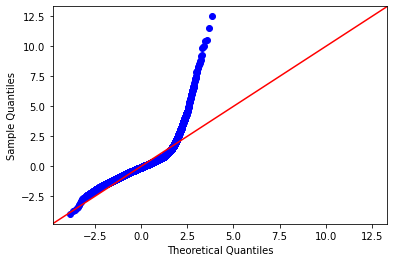

In [31]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [32]:
# Regression #2 : Using Log-Scaled & Standardized Variables

# Drop lat and long since ...

X_train_log = pd.DataFrame.copy(X_train)
X_train_log.drop(['lat','long'], axis=1, inplace=True)
X_train_log

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,is_renovated_True,has_basement_True
id,,,,,,,,,,
1937300280,2,1.0,1270,3700,1.5,3,7,1909,0,0
3856901435,4,2.0,1760,4500,1.5,5,7,1906,0,0
2071700010,3,2.0,2580,7434,1.0,3,7,1963,0,1
2254501335,3,2.0,1460,3600,2.0,3,7,1902,0,0
7129300175,4,1.0,1580,8475,1.5,4,7,1928,0,0
...,...,...,...,...,...,...,...,...,...,...
7972604355,3,1.0,1020,7874,1.0,3,7,1956,0,0
9274203036,3,3.0,2950,4446,2.0,3,9,2001,0,1
1954440050,4,2.5,2050,8683,2.0,3,8,1987,0,0


In [33]:
log_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in X_train.columns:
    if col in log_col:
        new_log = np.log(X_train_log[col])
        X_train_log[col] = new_log

In [34]:
y_train_log = np.log(y_train)

In [35]:
X_train_log_scaled = (X_train_log - np.mean(X_train_log))/ np.std(X_train_log)
y_train_log_scaled = (y_train_log - np.mean(y_train_log))/ np.std(y_train_log)

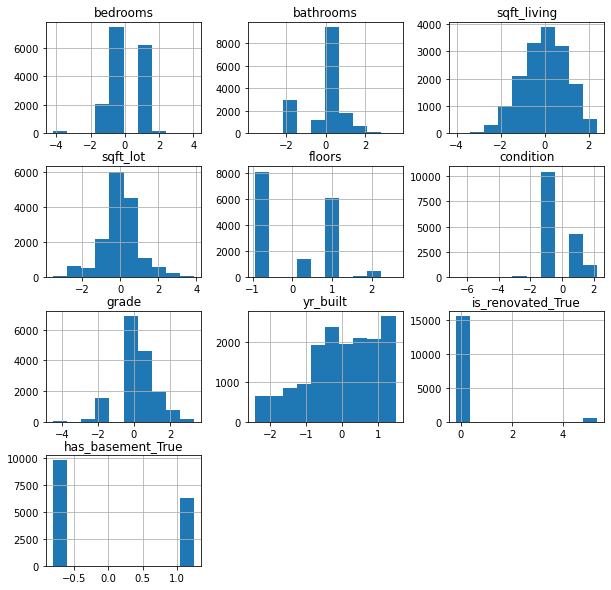

In [36]:
X_train_log_scaled.hist(figsize=[10,10]);


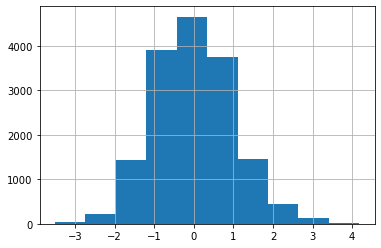

In [37]:
y_train_log_scaled.hist(figsize=[6,4]);


In [38]:

pred2 = sm.add_constant(X_train_log_scaled)
model2 = sm.OLS(endog=y_train_log_scaled, exog=pred2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     2376.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:30:10   Log-Likelihood:                -15548.
No. Observations:               16104   AIC:                         3.112e+04
Df Residuals:                   16093   BIC:                         3.120e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.365e-12      0.005  -4.72e-10      1.000      -0.010       0.010
bedrooms             -0.1060      0.007    -15.655      0.000      -0.119      -0.093
bathrooms             0.0743      0.009      8.622      0.000       0.057       0.091
sqft_living           0.3871      0.011     35.042      0.000       0.365       0.409
sqft_lot             -0.0759      0.006    -11.742      0.000      -0.089      -0.063
floors                0.0711      0.008      9.359      0.000       0.056       0.086
condition             0.0510      0.005      9.303      0.000       0.040       0.062
grade                 0.5114      0.008     65.035      0.000       0.496       0.527
yr_built             -0.3438      0.007    -49.131      0.000      -0.357      -0.330
is_renovated_True     0.0112      0.005      2.135      0.033       0.001       0.022
has_basement_True     0.0449      0.006      7.193      0.000       0.033       0.057
==============================================================================
Omnibus:                      122.785   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.108
Skew:                           0.072   Prob(JB):                     7.76e-40
Kurtosis:                       3.498   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X_test_log = pd.DataFrame.copy(X_test)

X_test_log.drop(['lat','long'], axis=1, inplace=True)

log_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in X_test.columns:
    if col in log_col:
        new_log = np.log(X_test_log[col])
        X_test_log[col] = new_log
        
y_test_log = np.log(y_test)

X_test_log_scaled = (X_test_log - np.mean(X_test_log))/ np.std(X_test_log)
y_test_log_scaled = (y_test_log - np.mean(y_test_log))/ np.std(y_test_log)


In [40]:
linreg = LinearRegression()
linreg.fit(X_train_log_scaled, y_train_log_scaled)

y_hat_log_scaled_train = linreg.predict(X_train_log_scaled)
y_hat_log_scaled_test = linreg.predict(X_test_log_scaled)

train_log_scaled_mse = mean_squared_error(y_train_log_scaled, y_hat_log_scaled_train)
test_log_scaled_mse = mean_squared_error(y_test_log_scaled, y_hat_log_scaled_test)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 0.40378178743533444
Test Mean Squarred Error: 0.38584014697876856


<ipython-input-41-e51042142ea7>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


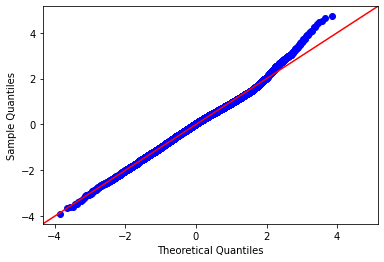

In [41]:
import scipy.stats as stats
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

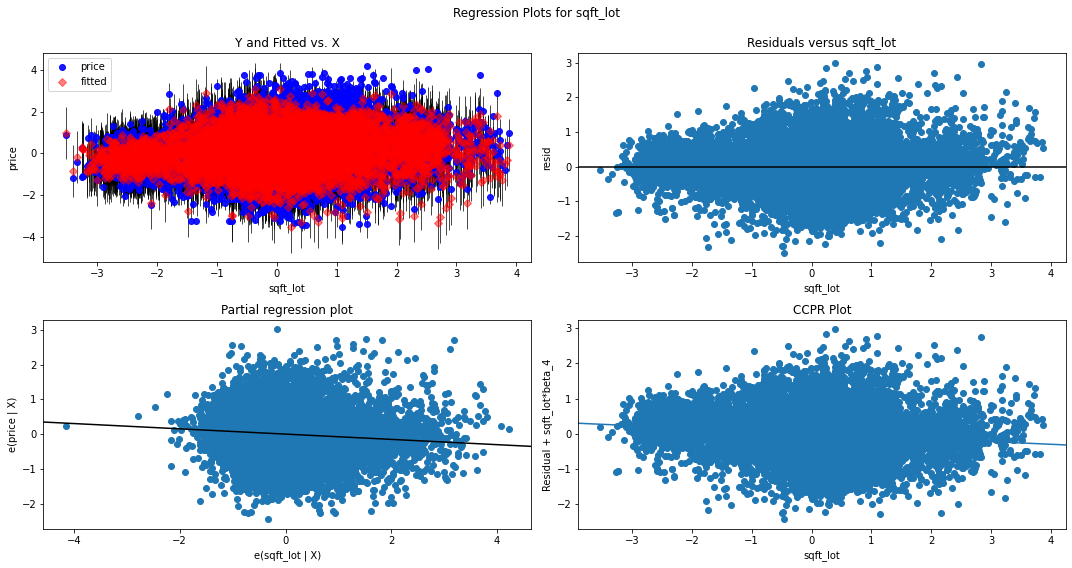

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "sqft_lot", fig=fig)
plt.show()

In [43]:
# Regression #3 : Recursive Feature Elimination

from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(pred2, y_train_log_scaled)

In [44]:
selector.support_


array([False,  True, False,  True,  True, False, False,  True,  True,
       False, False])

In [45]:
pred2.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'is_renovated_True',
       'has_basement_True'],
      dtype='object')

In [46]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-0.09793213  0.4771437  -0.11933507  0.52042785 -0.33792747]
-2.3837282834630664e-12


In [47]:

pred2_columns = list(pred2.columns)
tf = list(selector.support_)
filtered = np.array(pred2_columns)[np.array(tf)]
filtered
pred3 = pred2[filtered]
pred3

,bedrooms,sqft_living,sqft_lot,grade,yr_built
id,,,,,
1937300280,-1.717735,-0.945575,-0.899363,-0.506242,-2.118283
3856901435,0.761269,-0.132643,-0.637387,-0.506242,-2.223415
2071700010,-0.267611,0.820253,0.034448,-0.506242,-0.253642
2254501335,-0.267611,-0.598227,-0.936032,-0.506242,-2.363849
7129300175,0.761269,-0.401436,0.209848,-0.506242,-1.456258
...,...,...,...,...,...
7972604355,-0.267611,-1.491723,0.111406,-0.506242,-0.492440
9274203036,-0.267611,1.154138,-0.653545,1.283340,1.028016
1954440050,0.761269,0.247359,0.242298,0.444620,0.558680


In [48]:
pred3 = sm.add_constant(pred3)
model3 = sm.OLS(endog=y_train_log_scaled, exog=pred3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4608.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:30:12   Log-Likelihood:                -15697.
No. Observations:               16104   AIC:                         3.141e+04
Df Residuals:                   16098   BIC:                         3.145e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.384e-12      0.005  -4.72e-10      1.000      -0.010       0.010
bedrooms       -0.0979      0.007    -14.502      0.000      -0.111      -0.085
sqft_living     0.4771      0.009     51.753      0.000       0.459       0.495
sqft_lot       -0.1193      0.005    -22.031      0.000      -0.130      -0.109
grade           0.5204      0.008     66.652      0.000       0.505       0.536
yr_built       -0.3379      0.006    -58.748      0.000      -0.349      -0.327
==============================================================================
Omnibus:                      110.961   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.685
Skew:                           0.043   Prob(JB):                     1.05e-36
Kurtosis:                       3.489   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# pred2_columns = list(pred2.columns)
# tf = list(selector.support_)
# X_test_log_scaled =  np.array(pred2_columns)[np.array(tf)]

X_test_filtered = X_test_log_scaled[filtered]
X_test_filtered

X_train_filtered = X_train_log_scaled[filtered]
X_train_filtered

,bedrooms,sqft_living,sqft_lot,grade,yr_built
id,,,,,
1937300280,-1.717735,-0.945575,-0.899363,-0.506242,-2.118283
3856901435,0.761269,-0.132643,-0.637387,-0.506242,-2.223415
2071700010,-0.267611,0.820253,0.034448,-0.506242,-0.253642
2254501335,-0.267611,-0.598227,-0.936032,-0.506242,-2.363849
7129300175,0.761269,-0.401436,0.209848,-0.506242,-1.456258
...,...,...,...,...,...
7972604355,-0.267611,-1.491723,0.111406,-0.506242,-0.492440
9274203036,-0.267611,1.154138,-0.653545,1.283340,1.028016
1954440050,0.761269,0.247359,0.242298,0.444620,0.558680


In [50]:
linreg = LinearRegression()
linreg.fit(X_train_filtered, y_train_log_scaled)

y_hat_log_scaled_train = linreg.predict(X_train_filtered)
y_hat_log_scaled_test = linreg.predict(X_test_filtered)



train_log_scaled_mse = mean_squared_error(y_train_log_scaled, y_hat_log_scaled_train)
test_log_scaled_mse = mean_squared_error(y_test_log_scaled, y_hat_log_scaled_test)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 0.41132799570365475
Test Mean Squarred Error: 0.3910882207875645
